## Importing Required Libraries

In [1]:
import pandas as pd
import os
import glob as gb
import random
import subprocess
from tensorflow import keras



In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

## Assigning Path for Dataset

In [3]:
TRAIN_DIR = "C:\\Users\\yammi\\train"
TEST_DIR = "C:\\Users\\yammi\\test"
BATCH_SIZE=64

### Will see how many categories and images present

In [4]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 3995 in folder angry
For training data, found 436 in folder disgust
For training data, found 4097 in folder fear
For training data, found 7215 in folder happy
For training data, found 4830 in folder sad
For training data, found 3171 in folder surprise


In [5]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 958 in folder angry
For testing data, found 111 in folder disgust
For testing data, found 1024 in folder fear
For testing data, found 1774 in folder happy
For testing data, found 1247 in folder sad
For testing data, found 831 in folder surprise


### Will see some random images withe their labels

In [6]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [7]:
class_names = ['angry','disgust','fear','happy','sad','surprise']

Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)


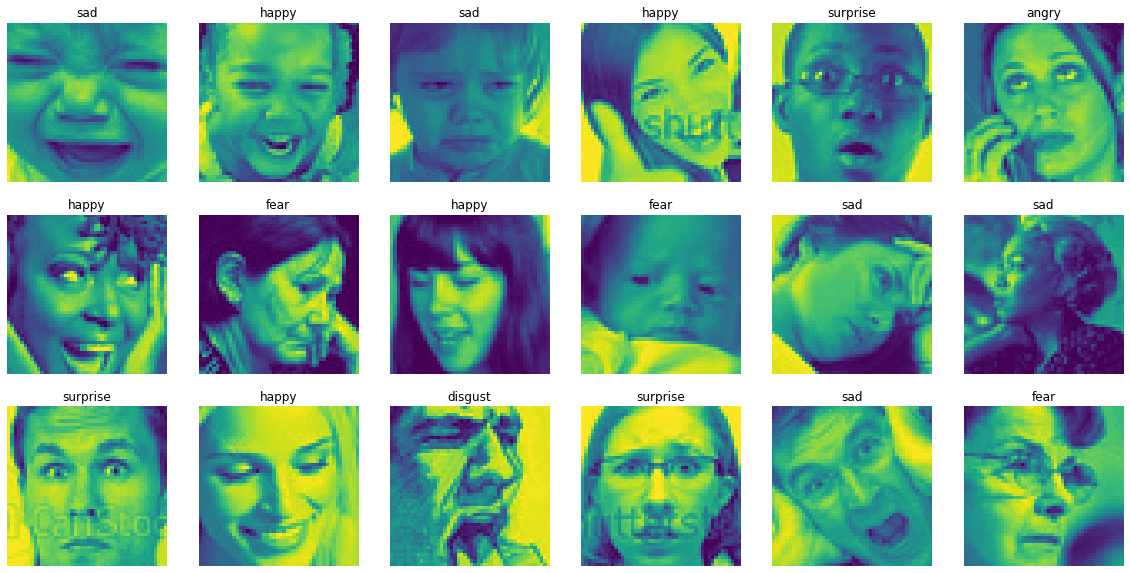

In [8]:
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3,6,i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="C:\\Users\\yammi\\train\\", target_class=class_name)

### Preparing data for training

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (128, 128),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (128, 128),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 23744 images belonging to 6 classes.
Found 5945 images belonging to 6 classes.


### Basic model building (CNN Classifier)

In [10]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 6, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [11]:
## model summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [12]:
history = classifier.fit(training_set,
                         epochs = 5,
                         validation_data = test_set)


classifier.save('model3.h5')  # creates a HDF5 file 'my_model.h5'

Epoch 1/5
371/371 [==============================] - 745s 2s/step - loss: 1.5458 - accuracy: 0.3781 - val_loss: 1.3736 - val_accuracy: 0.4463
Epoch 2/5
371/371 [==============================] - 435s 1s/step - loss: 1.3802 - accuracy: 0.4488 - val_loss: 1.2995 - val_accuracy: 0.4888
Epoch 3/5
371/371 [==============================] - 642s 2s/step - loss: 1.3123 - accuracy: 0.4757 - val_loss: 1.2497 - val_accuracy: 0.5001
Epoch 4/5
371/371 [==============================] - 505s 1s/step - loss: 1.2506 - accuracy: 0.5019 - val_loss: 1.2134 - val_accuracy: 0.5120
Epoch 5/5
371/371 [==============================] - 498s 1s/step - loss: 1.2133 - accuracy: 0.5139 - val_loss: 1.1977 - val_accuracy: 0.5309


### Evaluating the model

In [13]:
classifier.evaluate(test_set)

93/93 [==============================] - 134s 1s/step - loss: 1.1977 - accuracy: 0.5309


[1.197676181793213, 0.530866265296936]

Text(0, 0.5, 'Loss')

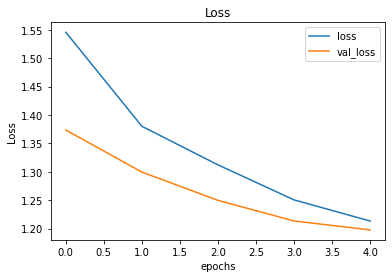

In [14]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

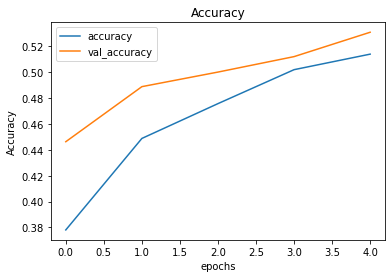

In [15]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [16]:
model_path = "model3.h5"
loaded_model = keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image


#c_array = np.asarray(image)


In [30]:
camera_port=0    #camera 0 is laptop camera
ramp_frames=30    #30 frames pause before taking a picture to adjust
camera=cv2.VideoCapture(camera_port)  #establishesthe camera

#captures a single image from the camera and return it in PIL format
def get_image():
  retval,im=camera.read()
  return im

for i in range(ramp_frames):
  temp=get_image()
print("Capturing image...")

#takes the picture
camera_capture=get_image()
file='test_image2.png'
cv2.imwrite(file, camera_capture)

#releases the camera
del camera
print("picture taken.")

Capturing image...
picture taken.


In [31]:
image = cv2.imread("C:\\Users\\yammi\\test_image2.png") 

In [32]:

image_fromarray = Image.fromarray(image, 'RGB')


In [33]:
resize_image = image_fromarray.resize((128, 128))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
#result

1/1 [==============================] - 0s 80ms/step


In [34]:
training_set.class_indices

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'sad': 4, 'surprise': 5}

In [ ]:
mp = 'C:/Program Files (x86)/Windows Media Player/wmplayer.exe'
if result==0:
    randomfile = random.choice(os.listdir("C:\\Users\\yammi\\Songs\\angry\\"))
    print("It seems you are 'ANGRY'")
    file=('C:\\Users\\yammi\\Songs\\angry\\'+randomfile)
    subprocess.call([mp,file])
if result==1:
    randomfile = random.choice(os.listdir("C:\\Users\\yammi\\Songs\\sad\\") )   
    print("It seems you are 'Disgust'")
    file=('C:\\Users\\yammi\\Songs\\sad\\'+randomfile)
    subprocess.call([mp,file])
if result==2:
    randomfile = random.choice(os.listdir("C:\\Users\\yammi\\Songs\\happy\\"))
    print("It seems you are 'Fear'")
    file=('C:\\Users\\yammi\\Songs\\happy\\'+randomfile)
    subprocess.call([mp,file])
if result==3:
    randomfile = random.choice(os.listdir("C:\\Users\\yammi\\Songs\\happy\\"))
    print("It seems you are 'Happy'")
    file=('C:\\Users\\yammi\\Songs\\happy\\'+randomfile)
    subprocess.call([mp,file])
if result==4:
    randomfile = random.choice(os.listdir("C:\\Users\\yammi\\Songs\\sad\\"))                           
    print("It seems you are 'Sad'")
    file=('C:\\Users\\yammi\\Songs\\sad\\'+randomfile)
    subprocess.call([mp,file])
if result==5:
    randomfile = random.choice(os.listdir("C:\\Users\\yammi\\Songs\\angry\\"))
    print("It seems you are 'Surrise'")
    file=('C:\\Users\\yammi\\Songs\\angry\\'+randomfile)
    subprocess.call([mp,file])

    

It seems you are 'ANGRY'


#mp = 'C:/Program Files (x86)/Windows Media Player/wmplayer.exe'

#randomfile = random.choice(os.listdir("C:/Users/kusha/PycharmProjects/Music_player_with_Emotions_recognition/songs/Smile/"))
              #  print('You are smiling :) ,I playing special song for you: ' + randomfile)
              #  file = ('C:/Users/kusha/PycharmProjects/Music_player_with_Emotions_recognition/songs/Smile/' + randomfile)
              #  subprocess.call([mp, file])